# The Mathematical Engineering of Deep Learning
----

## Practical 4 (Python version)
**For an R or Julia version see the [course website](https://deeplearningmath.org/)**.

# Goals
----
In this tutorial, we mainly use the MNIST dataset to explore classification deep neural networks (DNN) models.
At the end of this tutorial, you should be comfortable to use a software package (here **keras**) to run different models for a classification task.  You will explore different models by exploring/tuning different hyperparamaters of the DNN: 

- number of layers and nodes
- batch normalization
- regularization technique
- dropout 
- weight initialization
- Early stopping




# MNIST Data set 
----
## Loading package and dataset

First you have to install **keras** R packages using 

In [1]:
from keras.datasets import mnist
(train_X,train_Y), (test_X,test_Y) = mnist.load_data()
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

11493376/11490434 [==============================] - 0s 0us/step
Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [2]:
# Find the unique numbers from the train labels
import numpy as np

classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of classes : ', nClasses)
print('Classes : ', classes)


Total number of classes :  10
Classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Class : 5')

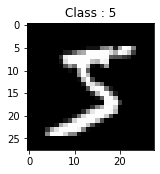

In [3]:
# Display the first image in training data
import matplotlib.pyplot as plt

plt.figure(figsize=[5,5])
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Class : {}".format(train_Y[0]))

In [4]:
train_X[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

**Reminder:** Keep in mind that all features need to be numeric for running a feedforward DNN. When you have some categorical features you have to transform into numerical values such as one-hot encoded.

## Scale the data set

The data is in gray scale with each image having a value between 0 and 255. We therefore need to normalize the data by 255.

input for reshape: 60000, 28, 28
output of reshape: 60000, 784

In [5]:
a = np.array([[[1,2,3],[4,5,6], [5,6,7]], [[1.1,2,3.3],[4,5,6], [5,6,7]]])
a.shape
b = a.reshape(2, 9)
b.shape
print(a)

[[[1.  2.  3. ]
  [4.  5.  6. ]
  [5.  6.  7. ]]

 [[1.1 2.  3.3]
  [4.  5.  6. ]
  [5.  6.  7. ]]]


In [6]:
print(b)

[[1.  2.  3.  4.  5.  6.  5.  6.  7. ]
 [1.1 2.  3.3 4.  5.  6.  5.  6.  7. ]]


In [7]:
##### Changing the type
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

##### Data processing
train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)

#### Normalizing the data
train_X = train_X / 255
test_X = test_X / 255

In [8]:
print(train_X.shape, test_X.shape)

(60000, 784) (10000, 784)


In [9]:
train_X[0]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

##  Transform the label data

For multi-classification model (multinomial response 0 to 9), Keras uses one-hot encoded for the outcome. For example, the digit 5 image that we have plotted above has a label of 5, so for all the digit 5 images, the one hot encoding vector would be $[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]$. 

In [10]:
# Change the labels from categorical to one-hot encoding
from keras.utils import to_categorical

train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)


In [11]:
# Cross check
print('First image\'s class:', train_Y[0])
print('First image\'s one hot encoding:', train_Y_one_hot[0])


First image's class: 5
First image's one hot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#  Implementation of a DNN using Keras
----

## Procedure
  * Initiate a sequential feed-forward DNN using keras.model.sequential()
  * Add some dense layers.


In [12]:
from keras.models import Sequential, Input
from keras.layers import Dense

model = Sequential()
model.add(Input(shape=(train_X[0].size,)))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

Here, we have two hidden layers:

  * 128 neurons for the first layer
  * 64 for the second
  * 10 neurons for the output layer

Note that the **shape** in **Input** argument represents the number of features in the data (here 784). It is natural to choose the **softmax** function for the output layer. It is the most common to use **ReLU** activation for hidden layer.

## Backpropagation and Optimizer

We have to define our objective function to optimize and the optimizer to get a solution. The natural choise here is the cross entropy for categorical outcome. In lecture 3 you have learned different variants of the gradient descent. Keras offers several optimizers:

  * Stochastic gradient descent (sgd) optimizer
  * Adaptive Moment Estimation (adam)
  * RMSprop
  * Adaptive learning rate (Adadelta)


In [13]:
# Compile 
import keras
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


## Train our model

We will train our model on 25 epochs and a bath size of 128. We also use 20%
of our data for the validation step during the training phase, meaning that 60,000×0.2=12,000 of the samples are using for the validation step while 48,000 samples are used for the optimization step.

**Reminder:** An epoch describes the number of times the algorithm sees the entire data set. So with a batch size of 128, one epoch is achieved after 48,000/128 = 375 passes.

In [14]:
# Train-validation Split of the training data
from sklearn.model_selection import train_test_split

np.random.seed(1)
train_train_X, train_valid_X, train_train_label, train_valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=42, shuffle=True)

print(train_train_X.shape, train_valid_X.shape, train_train_label.shape, train_valid_label.shape)

(48000, 784) (12000, 784) (48000, 10) (12000, 10)


In [15]:
fit1 = model.fit(train_train_X, train_train_label, batch_size=128, epochs=25, verbose=1, validation_data=(train_valid_X, train_valid_label))

Epoch 1/25
375/375 [==============================] - 4s 4ms/step - loss: 0.5915 - accuracy: 0.8356 - val_loss: 0.1833 - val_accuracy: 0.9457
Epoch 2/25
375/375 [==============================] - 1s 3ms/step - loss: 0.1605 - accuracy: 0.9531 - val_loss: 0.1266 - val_accuracy: 0.9618
Epoch 3/25
375/375 [==============================] - 1s 3ms/step - loss: 0.1086 - accuracy: 0.9674 - val_loss: 0.1127 - val_accuracy: 0.9673
Epoch 4/25
375/375 [==============================] - 1s 3ms/step - loss: 0.0777 - accuracy: 0.9769 - val_loss: 0.0973 - val_accuracy: 0.9722
Epoch 5/25
375/375 [==============================] - 1s 3ms/step - loss: 0.0593 - accuracy: 0.9821 - val_loss: 0.0879 - val_accuracy: 0.9747
Epoch 6/25
375/375 [==============================] - 1s 3ms/step - loss: 0.0453 - accuracy: 0.9865 - val_loss: 0.0824 - val_accuracy: 0.9759
Epoch 7/25
375/375 [==============================] - 1s 3ms/step - loss: 0.0383 - accuracy: 0.9884 - val_loss: 0.0864 - val_accuracy: 0.9761
Epoch 

Test loss: 0.14180326461791992
Test accuracy: 0.9781000018119812


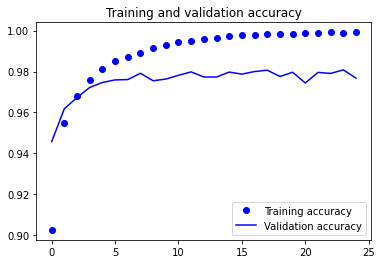

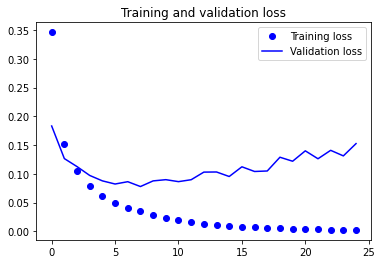

In [16]:
test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=0)


print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

accuracy = fit1.history['accuracy']
val_accuracy = fit1.history['val_accuracy']
loss = fit1.history['loss']
val_loss = fit1.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

We can see that the loss function improves rapidly. However, we can see a potential overfit after 10 epochs. Indeed, the accurary rate of the validation set presents a flat shape after 10 epochs.

## Prediction

We can predict now the class (digits) for a new image.

In [17]:
predicted_classes = model.predict(test_X[0:20])
predicted_classes

array([[3.06615895e-16, 4.96388339e-22, 4.67761769e-16, 9.97169795e-12,
        5.29131040e-21, 1.07541435e-19, 4.95522227e-28, 1.00000000e+00,
        3.62433243e-15, 2.75501044e-09],
       [2.15525635e-23, 9.21771408e-14, 1.00000000e+00, 1.07352346e-14,
        1.83413916e-37, 5.72200977e-22, 3.68955886e-24, 3.28755818e-27,
        6.05428798e-21, 3.98224535e-33],
       [2.50287031e-11, 9.99997616e-01, 2.03335571e-08, 5.10373948e-12,
        2.40133318e-07, 5.54431168e-10, 7.23478777e-10, 1.82770657e-06,
        3.11799937e-07, 5.73493987e-12],
       [1.00000000e+00, 1.01424817e-17, 1.87069196e-15, 8.28051551e-18,
        7.79857972e-19, 1.01070061e-21, 2.06952119e-16, 1.60588624e-13,
        3.36579862e-22, 8.92723666e-13],
       [9.75159016e-12, 3.47760591e-20, 5.28977634e-16, 6.79357316e-18,
        9.99356687e-01, 6.87825111e-16, 3.49522344e-15, 3.91589561e-09,
        2.14425120e-14, 6.43318228e-04],
       [5.40442528e-13, 9.99999285e-01, 5.74846106e-13, 2.50817501e-14,
   

In [21]:
sum(predicted_classes[2])

1.0000000171013672

Observe that the predictions are floating point values, it is difficult to compare them with true test labels. So we now round off the output into integers.

In [ ]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4])

In [ ]:
# Comparing with true labels
test_Y[0:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=uint8)

In [ ]:
# For the entire test data
predicted_classes = model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


In [ ]:
np.unique(predicted_classes, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 990, 1146, 1057,  986,  988,  892,  950, 1021,  981,  989]))

In [ ]:
np.unique(test_Y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [ ]:
import sklearn.metrics
cm = sklearn.metrics.confusion_matrix(test_Y, predicted_classes)

In [ ]:
print(cm)

[[ 968    2    1    1    1    0    3    1    2    1]
 [   0 1125    4    0    0    1    2    1    2    0]
 [   4    1 1017    1    2    0    2    3    2    0]
 [   2    4   12  968    0    7    0    5    9    3]
 [   1    0    0    0  971    0    2    2    1    5]
 [   4    0    0    6    1  872    3    1    4    1]
 [   6    3    1    1    3    4  934    1    5    0]
 [   2    7   10    1    1    0    0  995    6    6]
 [   3    2   12    3    1    4    2    3  942    2]
 [   0    2    0    5    8    4    2    9    8  971]]


In [ ]:
print('Accuracy:', sum(np.diag(cm))/test_X.shape[0])

Accuracy: 0.9763


# Improve our model by tuning some parameters
-----

## Model complexity

We will explore different model size by playing with the number of hidden layers from 1 to 3 and different number of neurons. Complex models have higher capacity to learn more features and patterns in the data, however they can overfit the training data. We try to maximize a high validation performance while minimizing the complexity of our model. The folowing table presents the 9 models that we will explore:

In [ ]:
from google.colab import data_table
import pandas as pd

city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

df = pd.DataFrame({'Size':['1 Hidden Layer','2 Hidden Layers','3 Hidden Layers'],
                   'Small':[16,(16, 8), (16, 8, 4)],
                   'Medium':[64, (64, 32), (64, 32, 16)],
                   'Large': [256 , (256, 128), (256, 128, 64)]})

data_table.DataTable(df, include_index=False)

,Size,Small,Medium,Large
0,1 Hidden Layer,16,64,256
1,2 Hidden Layers,"(16, 8)","(64, 32)","(256, 128)"
2,3 Hidden Layers,"(16, 8, 4)","(64, 32, 16)","(256, 128, 64)"


We have 9 models to run !!! better to wrap it into a nice function.


In [ ]:
def compiler(mdl):
  mdl.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])
  mdl.summary()
  return

def trainer(mdl):
  ft = mdl.fit(train_train_X, train_train_label, batch_size=128, epochs=25, verbose=1, validation_data=(train_valid_X, train_valid_label))
  return ft

## One layer model

In [ ]:
## Small model with 1 layer
small_1_layer_model = Sequential()
small_1_layer_model.add(Input(shape=(train_X[0].size,)))
small_1_layer_model.add(Dense(16, activation="relu"))
small_1_layer_model.add(Dense(10, activation="softmax"))
compiler(small_1_layer_model)
fit_s_1 = trainer(small_1_layer_model)

## Medium model with 1 layer
medium_1_layer_model = Sequential()
medium_1_layer_model.add(Input(shape=(train_X[0].size,)))
medium_1_layer_model.add(Dense(64, activation="relu"))
medium_1_layer_model.add(Dense(10, activation="softmax"))
compiler(medium_1_layer_model)
fit_m_1 = trainer(medium_1_layer_model)

## Large model with 1 layer
large_1_layer_model = Sequential()
large_1_layer_model.add(Input(shape=(train_X[0].size,)))
large_1_layer_model.add(Dense(256, activation="relu"))
large_1_layer_model.add(Dense(10, activation="softmax"))
compiler(large_1_layer_model)
fit_l_1 = trainer(large_1_layer_model)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
375/375 [==============================] - 2s 3ms/step - loss: 1.0311 - accuracy: 0.7079 - val_loss: 0.3430 - val_accuracy: 0.9057
Epoch 2/25
375/375 [==============================] - 1s 3ms/step - loss: 0.3331 - accuracy: 0.9079 - val_loss: 0.2929 - val_accuracy: 0.9178
Epoch 3/25
375/375 [==============================] - 1s 3ms/step - loss: 0.2903 - accuracy: 0.9184 - val_loss: 0.2746 - val_accuracy: 0.9243
Epoch 4/25
375/375 [==============================] - 1s 3ms/step - loss: 0.2705 - acc

In [ ]:
## function for plotting the results

def plot_results(mdl, ft):
  test_eval = mdl.evaluate(test_X, test_Y_one_hot, verbose=0)
  print('Test loss:', test_eval[0])
  print('Test accuracy:', test_eval[1])

  accuracy = ft.history['accuracy']
  val_accuracy = ft.history['val_accuracy']
  loss = ft.history['loss']
  val_loss = ft.history['val_loss']
  epochs = range(len(accuracy))
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
  plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()
  return


Test loss: 0.18719898164272308
Test accuracy: 0.9448000192642212


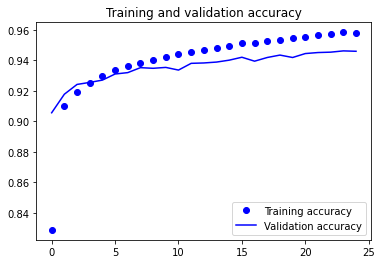

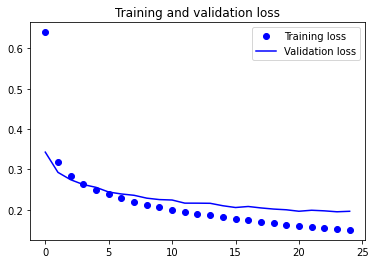

In [ ]:
## Results for small model with 1 layer
plot_results(small_1_layer_model, fit_s_1)

Test loss: 0.10856138914823532
Test accuracy: 0.9710999727249146


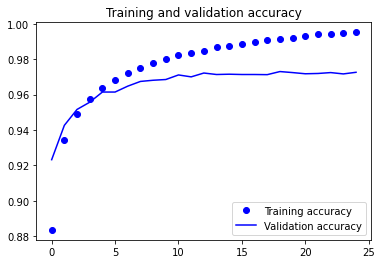

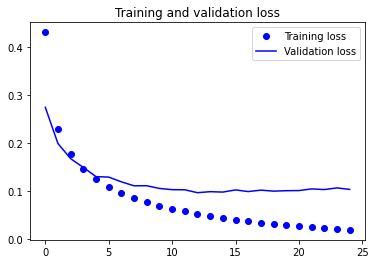

In [ ]:
## Results for medium model with 1 layer
plot_results(medium_1_layer_model, fit_m_1)

Test loss: 0.12158320099115372
Test accuracy: 0.9771999716758728


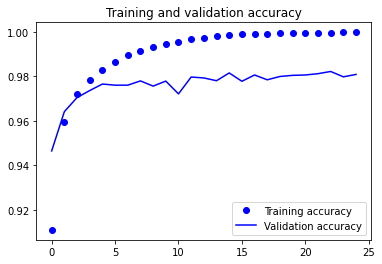

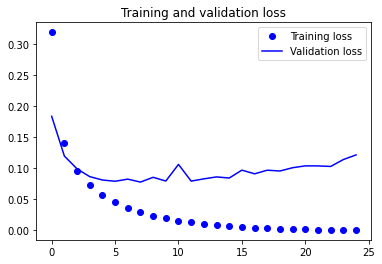

In [ ]:
## Results for large model with 1 layer
plot_results(large_1_layer_model, fit_l_1)

<font color='red'>**Task 1**: Do the same for models with 2 and 3 hidden layers </font>

<font color='red'>**Task 2**: 
What are you conclusions from this experiment? which models present some overfit issue? which models to keep? </font>


# Batch normalization
-----

Here we will add a normalization batch step after each layer. An example using the following code.

In [ ]:
from keras.layers import BatchNormalization

model_w_norm = Sequential()
model_w_norm.add(Input(shape=(train_X[0].size,)))
model_w_norm.add(BatchNormalization())
model_w_norm.add(Dense(128, activation="relu"))
model_w_norm.add(BatchNormalization())
model_w_norm.add(Dense(64, activation="relu"))
model_w_norm.add(BatchNormalization())
model_w_norm.add(Dense(10, activation="softmax"))


In [ ]:
compiler(model_w_norm)
fit_w_norm = trainer(model_w_norm)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                650       
Total params: 113,290
Trainable params: 111,338
Non-trainable params: 1,952
____________________________________________

Test loss: 0.1333978921175003
Test accuracy: 0.9739999771118164


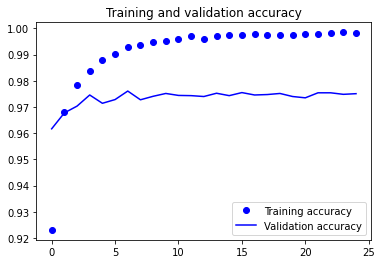

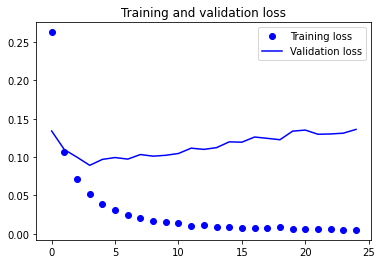

In [ ]:
plot_results(model_w_norm, fit_w_norm)

Now we can explore the batchnormalization on our 9 models

In [ ]:

# One layer models -----------------------------------------
## Small model

model_one_small = Sequential()
model_one_small.add(Input(shape=(train_X[0].size,)))
model_one_small.add(BatchNormalization())
model_one_small.add(Dense(16, activation="relu"))
model_one_small.add(BatchNormalization())
model_one_small.add(Dense(10, activation="softmax"))
compiler(model_one_small)
fit_one_small = trainer(model_one_small)

## Medium model
model_one_medium = Sequential()
model_one_medium.add(Input(shape=(train_X[0].size,)))
model_one_medium.add(BatchNormalization())
model_one_medium.add(Dense(64, activation="relu"))
model_one_medium.add(BatchNormalization())
model_one_medium.add(Dense(10, activation="softmax"))
compiler(model_one_medium)
fit_one_medium = trainer(model_one_medium)


## Large model
model_one_large = Sequential()
model_one_large.add(Input(shape=(train_X[0].size,)))
model_one_large.add(BatchNormalization())
model_one_large.add(Dense(256, activation="relu"))
model_one_large.add(BatchNormalization())
model_one_large.add(Dense(10, activation="softmax"))
compiler(model_one_large)
fit_one_large = trainer(model_one_large)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_14 (Dense)             (None, 16)                12560     
_________________________________________________________________
batch_normalization_4 (Batch (None, 16)                64        
_________________________________________________________________
dense_15 (Dense)             (None, 10)                170       
Total params: 15,930
Trainable params: 14,330
Non-trainable params: 1,600
_________________________________________________________________
Epoch 1/25
375/375 [==============================] - 2s 4ms/step - loss: 0.9159 - accuracy: 0.7418 - val_loss: 0.3197 - val_accuracy: 0.9153
Epoch 2/25
375/375 [==============================] - 1s 4ms/step - loss: 0.2838 - accuracy: 0.9225 - 

Test loss: 0.12321969866752625
Test accuracy: 0.9782000184059143


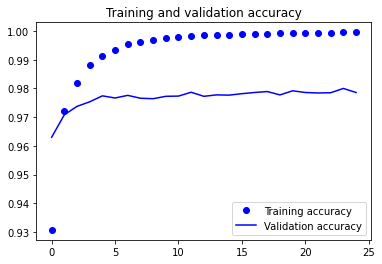

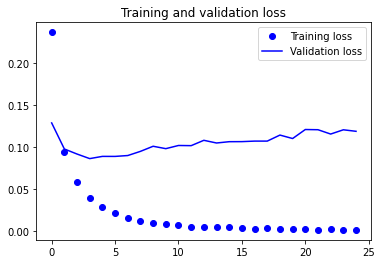

In [ ]:
plot_results(model_one_large, fit_one_large)

In [ ]:
# Two layer models -----------------------------------------
## Small model

model_two_small = Sequential()
model_two_small.add(Input(shape=(train_X[0].size,)))
model_two_small.add(BatchNormalization())
model_two_small.add(Dense(16, activation="relu"))
model_two_small.add(BatchNormalization())
model_two_small.add(Dense(8, activation="relu"))
model_two_small.add(BatchNormalization())
model_two_small.add(Dense(10, activation="softmax"))
compiler(model_two_small)
fit_two_small = trainer(model_two_small)

## Medium model
model_two_medium = Sequential()
model_two_medium.add(Input(shape=(train_X[0].size,)))
model_two_medium.add(BatchNormalization())
model_two_medium.add(Dense(64, activation="relu"))
model_two_medium.add(BatchNormalization())
model_two_medium.add(Dense(32, activation="relu"))
model_two_medium.add(BatchNormalization())
model_two_medium.add(Dense(10, activation="softmax"))
compiler(model_two_medium)
fit_two_medium = trainer(model_two_medium)


## Large model
model_two_large = Sequential()
model_two_large.add(Input(shape=(train_X[0].size,)))
model_two_large.add(BatchNormalization())
model_two_large.add(Dense(256, activation="relu"))
model_two_large.add(BatchNormalization())
model_two_large.add(Dense(128, activation="relu"))
model_two_large.add(BatchNormalization())
model_two_large.add(Dense(10, activation="softmax"))
compiler(model_two_large)
fit_two_large = trainer(model_two_large)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_19 (Batc (None, 784)               3136      
_________________________________________________________________
dense_30 (Dense)             (None, 16)                12560     
_________________________________________________________________
batch_normalization_20 (Batc (None, 16)                64        
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 136       
_________________________________________________________________
batch_normalization_21 (Batc (None, 8)                 32        
_________________________________________________________________
dense_32 (Dense)             (None, 10)                90        
Total params: 16,018
Trainable params: 14,402
Non-trainable params: 1,616
_____________________________________________

Test loss: 0.17381563782691956
Test accuracy: 0.9521999955177307


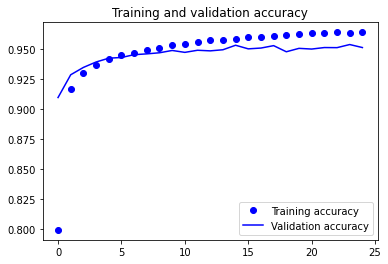

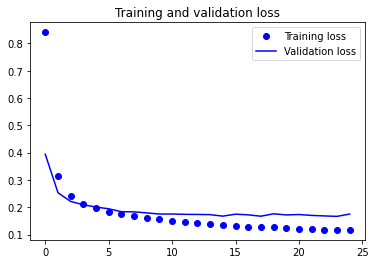

In [ ]:
plot_results(model_two_small, fit_two_small)

In [ ]:
# Three layer models -----------------------------------------
## Small model

model_three_small = Sequential()
model_three_small.add(Input(shape=(train_X[0].size,)))
model_three_small.add(BatchNormalization())
model_three_small.add(Dense(16, activation="relu"))
model_three_small.add(BatchNormalization())
model_three_small.add(Dense(8, activation="relu"))
model_three_small.add(BatchNormalization())
model_three_small.add(Dense(4, activation="relu"))
model_three_small.add(BatchNormalization())
model_three_small.add(Dense(10, activation="softmax"))
compiler(model_three_small)
fit_three_small = trainer(model_three_small)

## Medium model
model_three_medium = Sequential()
model_three_medium.add(Input(shape=(train_X[0].size,)))
model_three_medium.add(BatchNormalization())
model_three_medium.add(Dense(64, activation="relu"))
model_three_medium.add(BatchNormalization())
model_three_medium.add(Dense(32, activation="relu"))
model_three_medium.add(BatchNormalization())
model_three_medium.add(Dense(16, activation="relu"))
model_three_medium.add(BatchNormalization())
model_three_medium.add(Dense(10, activation="softmax"))
compiler(model_three_medium)
fit_three_medium = trainer(model_three_medium)


## Large model
model_three_large = Sequential()
model_three_large.add(Input(shape=(train_X[0].size,)))
model_three_large.add(BatchNormalization())
model_three_large.add(Dense(256, activation="relu"))
model_three_large.add(BatchNormalization())
model_three_large.add(Dense(128, activation="relu"))
model_three_large.add(BatchNormalization())
model_three_large.add(Dense(64, activation="relu"))
model_three_large.add(BatchNormalization())
model_three_large.add(Dense(10, activation="softmax"))
compiler(model_three_large)
fit_three_large = trainer(model_three_large)

In [ ]:
plot_results(model_three_small, fit_three_small)

# Reguralization

Reguralization is generally a good practice for overfitting issues. Here we explore $L_2$ reguralization.

In [ ]:
from keras.regularizers import l2

model_w_reg = Sequential()
model_w_reg.add(Input(shape=(train_X[0].size,)))
model_w_reg.add(BatchNormalization())
model_w_reg.add(Dense(256, activation="relu", kernel_regularizer=l2(0.001)))
model_w_reg.add(BatchNormalization())
model_w_reg.add(Dense(10, activation="softmax"))
compiler(model_w_reg)
fit_w_reg = trainer(model_w_reg)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_28 (Batc (None, 784)               3136      
_________________________________________________________________
dense_39 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_29 (Batc (None, 256)               1024      
_________________________________________________________________
dense_40 (Dense)             (None, 10)                2570      
Total params: 207,690
Trainable params: 205,610
Non-trainable params: 2,080
_________________________________________________________________
Epoch 1/25
375/375 [==============================] - 2s 4ms/step - loss: 0.6395 - accuracy: 0.8873 - val_loss: 0.2834 - val_accuracy: 0.9598
Epoch 2/25
375/375 [==============================] - 1s 4ms/step - loss: 0.2375 - accuracy: 0.9669

Test loss: 0.13867229223251343
Test accuracy: 0.9749000072479248


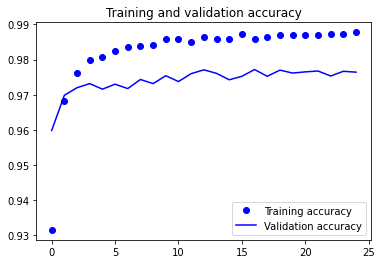

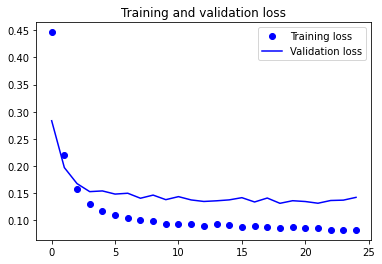

In [ ]:
plot_results(model_w_reg, fit_w_reg)

Test loss: 0.12321969866752625
Test accuracy: 0.9782000184059143


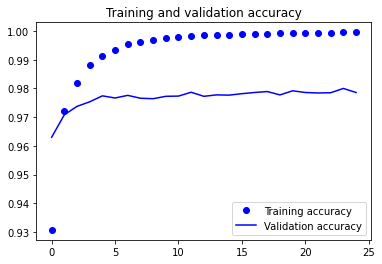

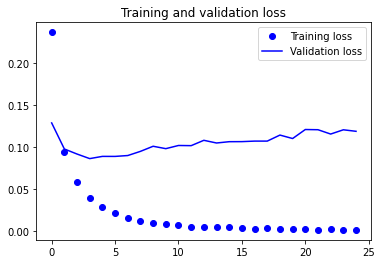

In [ ]:
plot_results(model_one_large, fit_one_large)

**Question:** Has $L_2$ reguralization improved the performance?


# Dropout

Another possible option for addressing overfitting is the dropout.

In [ ]:
from keras.layers import Dropout

model_w_dropout = Sequential()
model_w_dropout.add(Input(shape=(train_X[0].size,)))
model_w_dropout.add(BatchNormalization())
model_w_dropout.add(Dropout(0.4))
model_w_dropout.add(Dense(256, activation="relu", kernel_regularizer=l2(0.001)))
model_w_dropout.add(BatchNormalization())
model_w_dropout.add(Dropout(0.4))
model_w_dropout.add(Dense(128, activation="relu", kernel_regularizer=l2(0.001)))
model_w_dropout.add(BatchNormalization())
model_w_dropout.add(Dropout(0.4))
model_w_dropout.add(Dense(64, activation="relu", kernel_regularizer=l2(0.001)))
model_w_dropout.add(BatchNormalization())
model_w_dropout.add(Dropout(0.4))
model_w_dropout.add(Dense(10, activation="softmax"))
compiler(model_w_dropout)
fit_w_dropout = trainer(model_w_dropout)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_30 (Batc (None, 784)               3136      
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_31 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_32 (Batc (None, 128)             

Test loss: 0.21065841615200043
Test accuracy: 0.9739999771118164


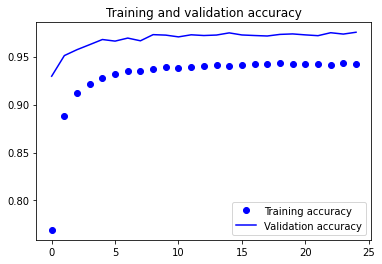

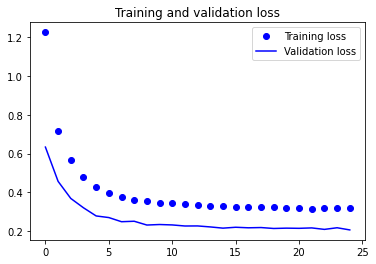

In [ ]:
plot_results(model_w_dropout, fit_w_dropout)

In [ ]:
plot_results(model_three_large, fit_three_large)

NameError: ignored

# Early stop

You can also adust the number of “epoch” by adding callback_early_stopping(patience = 5) to stop training if the loss has not improved after 5 epochs.

In [ ]:
from keras.callbacks import EarlyStopping
from keras import initializers
from keras.callbacks import EarlyStopping

model_w_callback = Sequential()
model_w_callback.add(Input(shape=(train_X[0].size,)))
model_w_callback.add(BatchNormalization())
model_w_callback.add(Dense(256, activation="relu", kernel_initializer=initializers.random_normal(stddev=0.01), kernel_regularizer=l2(0.001)))
model_w_callback.add(BatchNormalization())
#model_w_callback.add(Dropout(0.4))
model_w_callback.add(Dense(128, activation="relu", kernel_initializer=initializers.random_normal(stddev=0.01),  kernel_regularizer=l2(0.001)))
model_w_callback.add(BatchNormalization())
#model_w_callback.add(Dropout(0.4))
model_w_callback.add(Dense(64, activation="relu",kernel_initializer=initializers.random_normal(stddev=0.01), kernel_regularizer=l2(0.001)))
model_w_callback.add(BatchNormalization())
#model_w_callback.add(Dropout(0.4))
model_w_callback.add(Dense(10, activation="softmax"))
compiler(model_w_callback)
fit_w_callback = model_w_callback.fit(train_train_X, train_train_label, batch_size=128, epochs=25, verbose=1, validation_data=(train_valid_X, train_valid_label), callbacks=[EarlyStopping(patience=5)])


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_34 (Batc (None, 784)               3136      
_________________________________________________________________
dense_45 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_35 (Batc (None, 256)               1024      
_________________________________________________________________
dense_46 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_36 (Batc (None, 128)               512       
_________________________________________________________________
dense_47 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_37 (Batc (None, 64)              

Test loss: 0.16950957477092743
Test accuracy: 0.9706000089645386


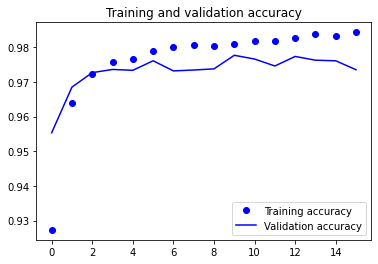

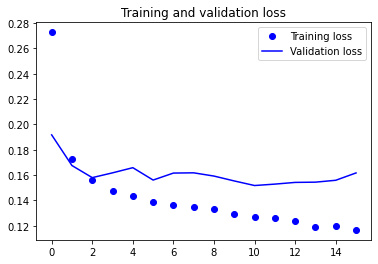

In [ ]:
plot_results(model_w_callback, fit_w_callback)


In [ ]:
keras.backend.clear_session()